In [1]:
import pandas as pd

In [3]:
ta= pd.read_csv(r"C:\Imatrius Learning\3 Python\Trip_advisor_review.csv" )
ta

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
ta.isnull().sum()[ta.isnull().sum()>0]

Series([], dtype: int64)

In [7]:
# 

In [9]:
import nltk
from nltk.corpus import stopwords

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
l1 =list(stopwords.words('english'))
l1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
len(stopwords.words('english'))

179

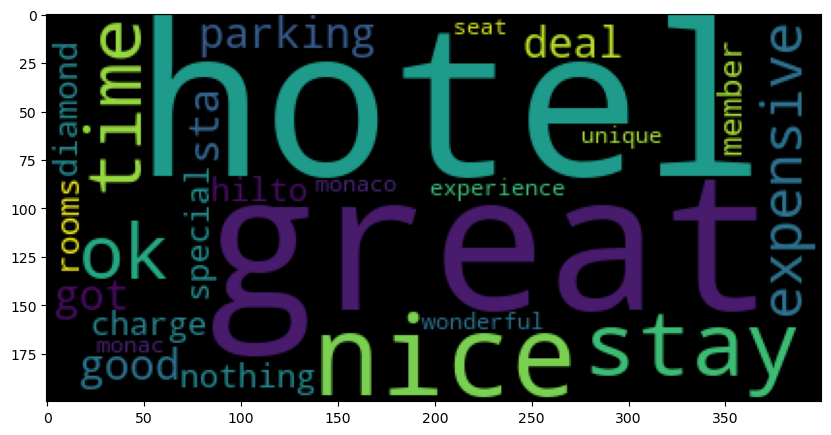

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud =WordCloud(stopwords =stopwords.words('english') , max_words=25).generate(str(ta.Review))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def text_process(mess): # creating a function         #TDM
   '''
   1.remove the punctutation
   2.remove the stopwords
   3.return the list of clean textwords
   '''

   nopunc = [char for char in mess if char not in string.punctuation]
   nopunc = ''.join(nopunc)

   return [ word for word in nopunc.split() if word not in l1]

In [15]:
ta['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(ta['Review'])

In [19]:
bow_transformer.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [25]:
len(bow_transformer.vocabulary_)

81408

In [26]:
message_bow =bow_transformer.transform(ta.Review)

In [27]:
message_bow.shape


(20491, 81408)

In [28]:
type(message_bow) 

scipy.sparse._csr.csr_matrix

In [47]:
from sklearn.model_selection import train_test_split

ta_train_x,ta_test_x,ta_train_y,ta_test_y = train_test_split(message_bow ,ta['Rating'], test_size=.2)

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ta_train_x , ta_train_y)
pred_test = rf.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[  95    8    2   47  123]
 [  23   12    4  130  170]
 [   3    7   10  186  254]
 [   1    0    1  339  916]
 [   0    1    0  132 1635]]
              precision    recall  f1-score   support

           1       0.78      0.35      0.48       275
           2       0.43      0.04      0.07       339
           3       0.59      0.02      0.04       460
           4       0.41      0.27      0.32      1257
           5       0.53      0.92      0.67      1768

    accuracy                           0.51      4099
   macro avg       0.55      0.32      0.32      4099
weighted avg       0.51      0.51      0.43      4099



In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(ta_train_x , ta_train_y)
pred_test = dt.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 105   61   28   34   47]
 [  66   60   48   85   80]
 [  27   53   82  183  115]
 [  35   74  117  461  570]
 [  34   55   88  484 1107]]
              precision    recall  f1-score   support

           1       0.39      0.38      0.39       275
           2       0.20      0.18      0.19       339
           3       0.23      0.18      0.20       460
           4       0.37      0.37      0.37      1257
           5       0.58      0.63      0.60      1768

    accuracy                           0.44      4099
   macro avg       0.35      0.35      0.35      4099
weighted avg       0.43      0.44      0.44      4099



In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ta_train_x , ta_train_y)
pred_test = logreg.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 177   64   20    6    8]
 [  81  124   67   48   19]
 [  17   80  146  164   53]
 [  10   31  115  610  491]
 [   5   17   24  404 1318]]
              precision    recall  f1-score   support

           1       0.61      0.64      0.63       275
           2       0.39      0.37      0.38       339
           3       0.39      0.32      0.35       460
           4       0.50      0.49      0.49      1257
           5       0.70      0.75      0.72      1768

    accuracy                           0.58      4099
   macro avg       0.52      0.51      0.51      4099
weighted avg       0.57      0.58      0.57      4099



C:\Users\ashish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(ta_train_x , ta_train_y)
pred_nb = nb.predict(ta_test_x)
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 177   64   20    6    8]
 [  81  124   67   48   19]
 [  17   80  146  164   53]
 [  10   31  115  610  491]
 [   5   17   24  404 1318]]
              precision    recall  f1-score   support

           1       0.61      0.64      0.63       275
           2       0.39      0.37      0.38       339
           3       0.39      0.32      0.35       460
           4       0.50      0.49      0.49      1257
           5       0.70      0.75      0.72      1768

    accuracy                           0.58      4099
   macro avg       0.52      0.51      0.51      4099
weighted avg       0.57      0.58      0.57      4099



In [ ]:
# # Hotel which i booked was very good.food servse was also good
# human emotation---> Random will be high
# Spam and ham ---> human emotation is low

# 1,2----> -ve
# 3------->neutral
# 4,5------->+ve

#Replace
# 1-->1
# 2-->1
# 3-->2
# 4-->3
# 5-->3

In [113]:
ta= pd.read_csv(r"C:\Imatrius Learning\3 Python\Trip_advisor_review.csv" )
ta

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [115]:
ta.Rating.replace({2:1,3:2,4:3,5:3},inplace=True)

C:\Users\ashish\AppData\Local\Temp\ipykernel_10536\3618267997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ta.Rating.replace({2:1,3:2,4:3,5:3},inplace=True)


In [117]:
import nltk
from nltk.corpus import stopwords

In [119]:
l1 =list(stopwords.words('english'))
l1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [121]:
len(stopwords.words('english'))

179

In [123]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [125]:
def text_process(mess): # creating a function         #TDM
   '''
   1.remove the punctutation
   2.remove the stopwords
   3.return the list of clean textwords
   '''

   nopunc = [char for char in mess if char not in string.punctuation]
   nopunc = ''.join(nopunc)

   return [ word for word in nopunc.split() if word not in l1]

In [127]:
ta['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(ta['Review'])

In [130]:
bow_transformer.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [131]:
len(bow_transformer.vocabulary_)

81408

In [132]:
message_bow =bow_transformer.transform(ta.Review)

In [133]:
message_bow.shape

(20491, 81408)

In [134]:
type(message_bow) 

scipy.sparse._csr.csr_matrix

In [135]:
from sklearn.model_selection import train_test_split

ta_train_x,ta_test_x,ta_train_y,ta_test_y = train_test_split(message_bow ,ta['Rating'], test_size=.2)

In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ta_train_x , ta_train_y)
pred_test = rf.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 182    0  440]
 [  12    0  452]
 [   4    0 3009]]
              precision    recall  f1-score   support

           1       0.92      0.29      0.44       622
           2       0.00      0.00      0.00       464
           3       0.77      1.00      0.87      3013

    accuracy                           0.78      4099
   macro avg       0.56      0.43      0.44      4099
weighted avg       0.71      0.78      0.71      4099



C:\Users\ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [138]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(ta_train_x , ta_train_y)
pred_test = dt.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 311   74  237]
 [  94   88  282]
 [ 175  229 2609]]
              precision    recall  f1-score   support

           1       0.54      0.50      0.52       622
           2       0.23      0.19      0.21       464
           3       0.83      0.87      0.85      3013

    accuracy                           0.73      4099
   macro avg       0.53      0.52      0.52      4099
weighted avg       0.72      0.73      0.73      4099



In [139]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ta_train_x , ta_train_y)
pred_test = logreg.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 455   81   86]
 [ 101  158  205]
 [  48  141 2824]]
              precision    recall  f1-score   support

           1       0.75      0.73      0.74       622
           2       0.42      0.34      0.37       464
           3       0.91      0.94      0.92      3013

    accuracy                           0.84      4099
   macro avg       0.69      0.67      0.68      4099
weighted avg       0.83      0.84      0.83      4099



C:\Users\ashish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(ta_train_x , ta_train_y)
pred_nb = nb.predict(ta_test_x)
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 455   81   86]
 [ 101  158  205]
 [  48  141 2824]]
              precision    recall  f1-score   support

           1       0.75      0.73      0.74       622
           2       0.42      0.34      0.37       464
           3       0.91      0.94      0.92      3013

    accuracy                           0.84      4099
   macro avg       0.69      0.67      0.68      4099
weighted avg       0.83      0.84      0.83      4099



In [42]:
ta= pd.read_csv(r"C:\Imatrius Learning\3 Python\Trip_advisor_review.csv" )
ta

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [44]:
ta.Rating.replace({2:1,3:2,4:2,5:2},inplace=True)

C:\Users\ashish\AppData\Local\Temp\ipykernel_9500\3847742663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ta.Rating.replace({2:1,3:2,4:2,5:2},inplace=True)


In [46]:
import nltk
from nltk.corpus import stopwords

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
l1 =list(stopwords.words('english'))
l1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
len(stopwords.words('english'))

179

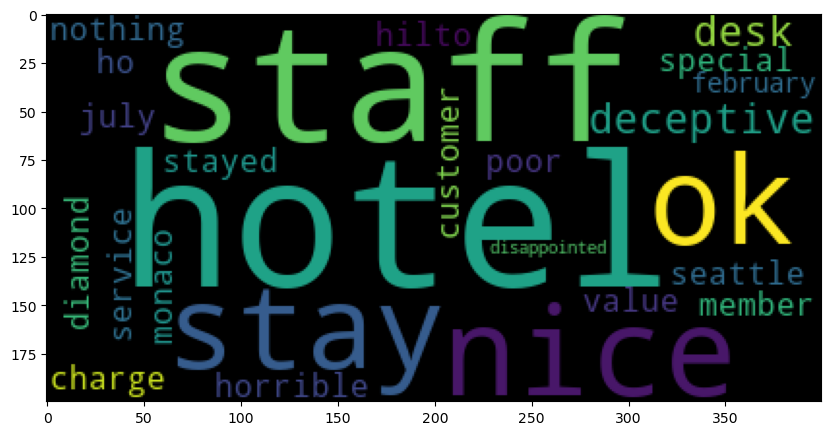

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df1 =ta[ta.Rating==1]  
df2 =ta[ta.Rating==2]
cloud =WordCloud(stopwords =stopwords.words('english') , max_words=25).generate(str(df1.Review))   #rating 1
plt.figure(figsize=(10,10))
plt.imshow(cloud)

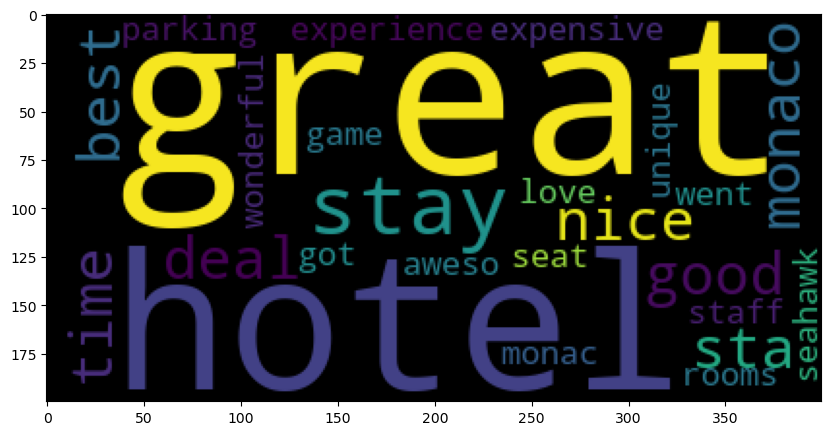

In [60]:
cloud =WordCloud(stopwords =stopwords.words('english') , max_words=25).generate(str(df2.Review))  # Rating 2 
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def text_process(mess): # creating a function         #TDM
   '''
   1.remove the punctutation
   2.remove the stopwords
   3.return the list of clean textwords
   '''

   nopunc = [char for char in mess if char not in string.punctuation]
   nopunc = ''.join(nopunc)

   return [ word for word in nopunc.split() if word not in l1]

In [19]:
ta['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(ta['Review'])

In [24]:
bow_transformer.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [25]:
len(bow_transformer.vocabulary_)

81408

In [29]:
message_bow =bow_transformer.transform(ta.Review)

In [30]:
message_bow.shape

(20491, 81408)

In [31]:
type(message_bow) 

scipy.sparse._csr.csr_matrix

In [35]:
from sklearn.model_selection import train_test_split

ta_train_x,ta_test_x,ta_train_y,ta_test_y = train_test_split(message_bow ,ta['Rating'], test_size=.2)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ta_train_x , ta_train_y)
pred_test = logreg.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 443  195]
 [ 118 3343]]
              precision    recall  f1-score   support

           1       0.79      0.69      0.74       638
           2       0.94      0.97      0.96      3461

    accuracy                           0.92      4099
   macro avg       0.87      0.83      0.85      4099
weighted avg       0.92      0.92      0.92      4099



C:\Users\ashish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(ta_train_x , ta_train_y)
pred_test = dt.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[ 336  302]
 [ 255 3206]]
              precision    recall  f1-score   support

           1       0.57      0.53      0.55       638
           2       0.91      0.93      0.92      3461

    accuracy                           0.86      4099
   macro avg       0.74      0.73      0.73      4099
weighted avg       0.86      0.86      0.86      4099



In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ta_train_x , ta_train_y)
pred_test = rf.predict(ta_test_x)
pred_test
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[  98  540]
 [   8 3453]]
              precision    recall  f1-score   support

           1       0.92      0.15      0.26       638
           2       0.86      1.00      0.93      3461

    accuracy                           0.87      4099
   macro avg       0.89      0.58      0.59      4099
weighted avg       0.87      0.87      0.82      4099



In [43]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(ta_train_x , ta_train_y)
pred_nb = nb.predict(ta_test_x)
tab1 = confusion_matrix(ta_test_y , pred_test)
print(tab1)
print(classification_report(ta_test_y , pred_test))

[[  98  540]
 [   8 3453]]
              precision    recall  f1-score   support

           1       0.92      0.15      0.26       638
           2       0.86      1.00      0.93      3461

    accuracy                           0.87      4099
   macro avg       0.89      0.58      0.59      4099
weighted avg       0.87      0.87      0.82      4099

